# Puppy Scientific Computing Talk: Clustering ZCTA5

Dylan Albrecht

April 19, 2018

In [1]:
import sys

In [2]:
import os
from collections import defaultdict

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

In [5]:
ZIP_MAP_FILE = os.path.join(os.pardir, 'data', 'zip_to_zcta_2017.csv')
ZIP_GEO_FILE = os.path.join(os.pardir, 'data', 'zip_codes.csv')

df_zip_zcta5_map = pd.read_csv(ZIP_MAP_FILE, dtype={'ZIP_CODE': np.object, 'ZCTA': np.object})
df_zip_geo = pd.read_csv(ZIP_GEO_FILE, dtype={'zip': np.object})

In [6]:
df_zip_zcta5_map['Geography'] = 'ZCTA5 ' + df_zip_zcta5_map['ZCTA']

In [7]:
df_zip_zcta5_map.head()

,ZIP_CODE,PO_NAME,STATE,ZIP_TYPE,ZCTA,Zip_join_type,Geography
0,00501,Holtsville,NY,Post Office or large volume customer,11742,Spatial join to ZCTA,ZCTA5 11742
1,00544,Holtsville,NY,Post Office or large volume customer,11742,Spatial join to ZCTA,ZCTA5 11742
2,00601,Adjuntas,PR,Zip Code Area,00601,Zip Matches ZCTA,ZCTA5 00601
3,00602,Aguada,PR,Zip Code Area,00602,Zip Matches ZCTA,ZCTA5 00602
4,00603,Aguadilla,PR,Zip Code Area,00603,Zip Matches ZCTA,ZCTA5 00603


In [8]:
def constant_factory(value):
    return lambda: value

zip_map = defaultdict(constant_factory(np.nan))
for k, v in zip(df_zip_zcta5_map['ZCTA'], df_zip_zcta5_map['ZIP_CODE']):
    zip_map[k] = v

In [9]:
df_zip_geo.head()

,zip,lat,lng
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


In [10]:
df_zip_geo.describe()

,lat,lng
count,33144.000000,33144.000000
mean,38.819930,-90.924452
std,5.391254,15.787902
min,13.260372,-176.629994
25%,35.389437,-97.234251
50%,39.493230,-88.192612
75%,42.120854,-80.219372
max,71.253500,145.754437


In [11]:
df_zip_geo[df_zip_geo['zip'] == '98104']

,zip,lat,lng
32365,98104,47.601884,-122.329459


(-170, -50)

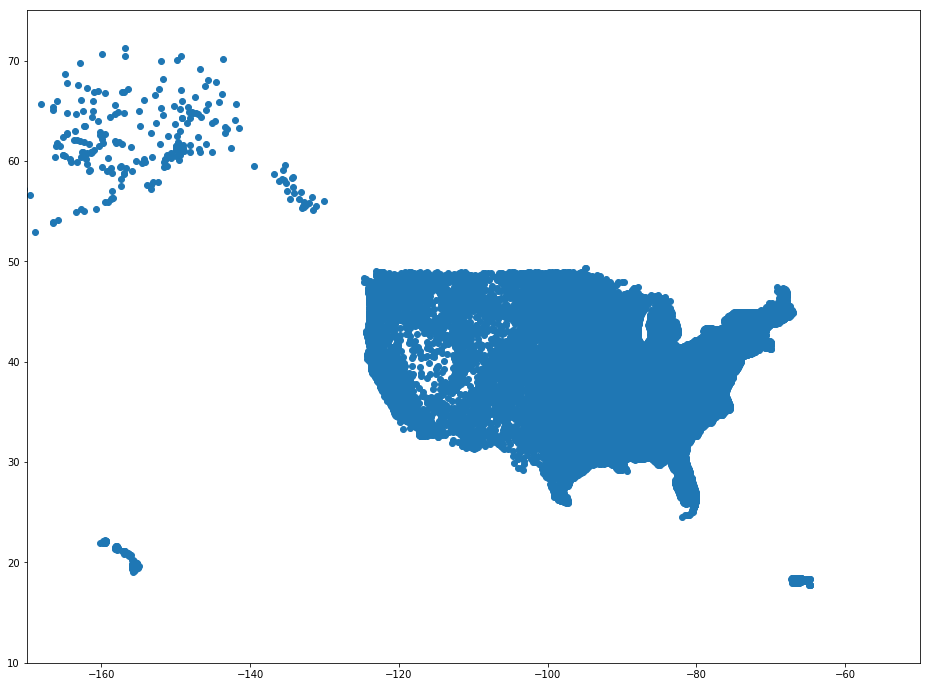

In [12]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(df_zip_geo['lng'], df_zip_geo['lat'])
ax.scatter(47, -122, c='r')
ax.set_ylim(10, 75)
ax.set_xlim(-170, -50)

## Detailed Demographics 2016

In [13]:
DEMO_FILE = os.path.join(os.pardir, 'data','ACS_16_5YR_DP05.csv')
df_demo = pd.read_csv(DEMO_FILE, encoding='latin1', skiprows=[0], dtype={'Id2': np.object})
df_demo.head()

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
0,8600000US00601,00601,ZCTA5 00601,17800,299.0,17800,NaN,8704,161.0,48.9,...,13646,NaN,6573,140,48.2,0.5,7073,120,51.8,0.5
1,8600000US00602,00602,ZCTA5 00602,39716,188.0,39716,NaN,19509,82.0,49.1,...,31048,NaN,15156,127,48.8,0.3,15892,223,51.2,0.3
2,8600000US00603,00603,ZCTA5 00603,51565,785.0,51565,NaN,25208,459.0,48.9,...,40167,NaN,19185,393,47.8,0.5,20982,365,52.2,0.5
3,8600000US00606,00606,ZCTA5 00606,6320,233.0,6320,NaN,3137,155.0,49.6,...,5007,NaN,2425,110,48.4,1.2,2582,97,51.6,1.2
4,8600000US00610,00610,ZCTA5 00610,27976,197.0,27976,NaN,13528,87.0,48.4,...,21981,NaN,10410,100,47.4,0.3,11571,138,52.6,0.3


In [14]:
df_demo.shape

(33120, 339)

In [15]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Columns: 339 entries, Id to Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female
dtypes: float64(186), int64(150), object(3)
memory usage: 85.7+ MB


In [16]:
drop_duplicates = []

for i, ci in enumerate(df_demo):
    for j, cj in enumerate(df_demo):
        if j <= i: continue
        if np.all(df_demo[ci]==df_demo[cj]):
            print(ci, cj)
            drop_duplicates.append(cj)

Estimate; SEX AND AGE - Total population Percent; SEX AND AGE - Total population
Estimate; SEX AND AGE - Total population Estimate; RACE - Total population
Estimate; SEX AND AGE - Total population Percent; RACE - Total population
Estimate; SEX AND AGE - Total population Estimate; RACE - Race alone or in combination with one or more other races - Total population
Estimate; SEX AND AGE - Total population Percent; RACE - Race alone or in combination with one or more other races - Total population
Estimate; SEX AND AGE - Total population Estimate; HISPANIC OR LATINO AND RACE - Total population
Estimate; SEX AND AGE - Total population Percent; HISPANIC OR LATINO AND RACE - Total population
Percent; SEX AND AGE - Total population Estimate; RACE - Total population
Percent; SEX AND AGE - Total population Percent; RACE - Total population
Percent; SEX AND AGE - Total population Estimate; RACE - Race alone or in combination with one or more other races - Total population
Percent; SEX AND AGE - To

In [17]:
len(drop_duplicates)

39

In [18]:
df_demo.drop(columns=drop_duplicates, inplace=True)

In [19]:
for c in df_demo:
    if 'Margin of Error' in c:
        df_demo.drop(c, inplace=True, axis=1)

In [20]:
for c in df_demo:
    print(c)

Id
Id2
Geography
Estimate; SEX AND AGE - Total population
Estimate; SEX AND AGE - Total population - Male
Percent; SEX AND AGE - Total population - Male
Estimate; SEX AND AGE - Total population - Female
Percent; SEX AND AGE - Total population - Female
Estimate; SEX AND AGE - Under 5 years
Percent; SEX AND AGE - Under 5 years
Estimate; SEX AND AGE - 5 to 9 years
Percent; SEX AND AGE - 5 to 9 years
Estimate; SEX AND AGE - 10 to 14 years
Percent; SEX AND AGE - 10 to 14 years
Estimate; SEX AND AGE - 15 to 19 years
Percent; SEX AND AGE - 15 to 19 years
Estimate; SEX AND AGE - 20 to 24 years
Percent; SEX AND AGE - 20 to 24 years
Estimate; SEX AND AGE - 25 to 34 years
Percent; SEX AND AGE - 25 to 34 years
Estimate; SEX AND AGE - 35 to 44 years
Percent; SEX AND AGE - 35 to 44 years
Estimate; SEX AND AGE - 45 to 54 years
Percent; SEX AND AGE - 45 to 54 years
Estimate; SEX AND AGE - 55 to 59 years
Percent; SEX AND AGE - 55 to 59 years
Estimate; SEX AND AGE - 60 to 64 years
Percent; SEX AND AGE -

In [21]:
for c in df_demo:
    if 'Percent' in c:
        df_demo.drop(c, inplace=True, axis=1)

In [22]:
df_demo.info(max_cols=200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 80 columns):
Id                                                                                                                                                                      33120 non-null object
Id2                                                                                                                                                                     33120 non-null object
Geography                                                                                                                                                               33120 non-null object
Estimate; SEX AND AGE - Total population                                                                                                                                33120 non-null int64
Estimate; SEX AND AGE - Total population - Male                                                                                     

In [23]:
df_demo.dropna(inplace=True, axis=1)

In [24]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 79 columns):
Id                                                                                                                                                                      33120 non-null object
Id2                                                                                                                                                                     33120 non-null object
Geography                                                                                                                                                               33120 non-null object
Estimate; SEX AND AGE - Total population                                                                                                                                33120 non-null int64
Estimate; SEX AND AGE - Total population - Male                                                                                     

In [25]:
df_demo['Id2'] = df_demo['Id2'].apply(lambda x: zip_map[x])
df_demo.shape

(33120, 79)

In [26]:
df_demo.rename(mapper={'Id2': 'zip', 'Geography': 'zcta5'}, axis='columns', inplace=True)
df_demo.head()

,Id,zip,zcta5,Estimate; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Estimate; SEX AND AGE - 5 to 9 years,Estimate; SEX AND AGE - 10 to 14 years,Estimate; SEX AND AGE - 15 to 19 years,...,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Asian alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Native Hawaiian and Other Pacific Islander alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Some other race alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races including Some other race,"Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races excluding Some other race, and Three or more races",Estimate; HISPANIC OR LATINO AND RACE - Total housing units,"Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
0,8600000US00601,00601,ZCTA5 00601,17800,8704,9096,937,1082,1309,1307,...,0,0,0,0,0,0,7290,13646,6573,7073
1,8600000US00602,00602,ZCTA5 00602,39716,19509,20207,1906,2464,2186,2830,...,59,0,31,960,32,928,17312,31048,15156,15892
2,8600000US00603,00605,ZCTA5 00603,51565,25208,26357,2547,3132,3190,3628,...,191,11,121,483,0,483,24594,40167,19185,20982
3,8600000US00606,00606,ZCTA5 00606,6320,3137,3183,329,287,400,465,...,0,0,0,0,0,0,2763,5007,2425,2582
4,8600000US00610,00610,ZCTA5 00610,27976,13528,14448,1345,1366,2021,2029,...,0,1,31,124,0,124,12265,21981,10410,11571


In [27]:
df_demo.iloc[:, 3:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 76 columns):
Estimate; SEX AND AGE - Total population                                                                                                                                33120 non-null int64
Estimate; SEX AND AGE - Total population - Male                                                                                                                         33120 non-null int64
Estimate; SEX AND AGE - Total population - Female                                                                                                                       33120 non-null int64
Estimate; SEX AND AGE - Under 5 years                                                                                                                                   33120 non-null int64
Estimate; SEX AND AGE - 5 to 9 years                                                                                                   

In [28]:
df_demo.dropna(inplace=True)

In [29]:
df_demo.shape

(33114, 79)

In [30]:
df_zip_geo.merge(df_demo, on='zip').shape

(29314, 81)

In [31]:
df_demo.merge(df_zip_geo, on='zip').shape

(29314, 81)

### Data properties

In [32]:
df_X = df_demo.iloc[:, 3:].copy()
df_X.shape

(33114, 76)

In [33]:
84 / 4

21.0

In [34]:
# for i, c in enumerate(df_X):
#     print("=" * 30)
#     print("Column: {}".format(i))
#     print("=" * 30)
#     print(df_X[c].describe())

In [35]:
from scipy.stats import boxcox
from scipy.stats import iqr

df_X = df_demo.iloc[:, 3:].copy()
df_X.reset_index(drop=True, inplace=True)
keep_indices = set(df_X.index.tolist())
drop_columns = []
factor = 1.5

for col in df_X:
    df_X[col] = boxcox(df_X[col] - df_X[col].min() + 1E-5)[0]
    
    q1 = np.percentile(df_X[col].values, 25)
    q3 = np.percentile(df_X[col].values, 75)
    
    step = factor * (q3 - q1)
    
    upper = q3 + step
    lower = q1 - step
    
    # Keep indices within 1.5 * IQR
    indices = set(df_X[(df_X[col] <= upper) & (df_X[col] >= lower)].index.tolist())
    
    if len(indices) < (len(df_X) - 0.10 * len(df_X)):
        drop_columns.append(col)
        continue
        
    keep_indices &= indices
    print(len(keep_indices), col)

32798 Estimate; SEX AND AGE - Total population
32798 Estimate; SEX AND AGE - Total population - Male
32798 Estimate; SEX AND AGE - Total population - Female
32796 Estimate; SEX AND AGE - Under 5 years
32796 Estimate; SEX AND AGE - 5 to 9 years
32796 Estimate; SEX AND AGE - 10 to 14 years
32793 Estimate; SEX AND AGE - 15 to 19 years
32769 Estimate; SEX AND AGE - 20 to 24 years
32766 Estimate; SEX AND AGE - 25 to 34 years
32766 Estimate; SEX AND AGE - 35 to 44 years
32766 Estimate; SEX AND AGE - 45 to 54 years
32766 Estimate; SEX AND AGE - 55 to 59 years
32766 Estimate; SEX AND AGE - 60 to 64 years
32765 Estimate; SEX AND AGE - 65 to 74 years
32757 Estimate; SEX AND AGE - 75 to 84 years
32756 Estimate; SEX AND AGE - 85 years and over
32756 Estimate; SEX AND AGE - 18 years and over
32753 Estimate; SEX AND AGE - 21 years and over
32753 Estimate; SEX AND AGE - 62 years and over
32753 Estimate; SEX AND AGE - 65 years and over
32753 Estimate; SEX AND AGE - 18 years and over - Male
32753 Estim

In [36]:
drop_columns

['Estimate; RACE - One race - American Indian and Alaska Native - Cherokee tribal grouping',
 'Estimate; RACE - One race - Asian - Japanese',
 'Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander',
 'Estimate; RACE - Two or more races - Black or African American and American Indian and Alaska Native',
 'Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Native Hawaiian and Other Pacific Islander alone',
 'Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races including Some other race']

In [37]:
df_X.drop(columns=drop_columns, inplace=True)

In [38]:
df_X = df_X.iloc[list(keep_indices), :].reset_index(drop=True).copy()

In [39]:
df_X.shape

(22918, 70)

In [40]:
for i, c in enumerate(df_X):
    print(i, c)

0 Estimate; SEX AND AGE - Total population
1 Estimate; SEX AND AGE - Total population - Male
2 Estimate; SEX AND AGE - Total population - Female
3 Estimate; SEX AND AGE - Under 5 years
4 Estimate; SEX AND AGE - 5 to 9 years
5 Estimate; SEX AND AGE - 10 to 14 years
6 Estimate; SEX AND AGE - 15 to 19 years
7 Estimate; SEX AND AGE - 20 to 24 years
8 Estimate; SEX AND AGE - 25 to 34 years
9 Estimate; SEX AND AGE - 35 to 44 years
10 Estimate; SEX AND AGE - 45 to 54 years
11 Estimate; SEX AND AGE - 55 to 59 years
12 Estimate; SEX AND AGE - 60 to 64 years
13 Estimate; SEX AND AGE - 65 to 74 years
14 Estimate; SEX AND AGE - 75 to 84 years
15 Estimate; SEX AND AGE - 85 years and over
16 Estimate; SEX AND AGE - 18 years and over
17 Estimate; SEX AND AGE - 21 years and over
18 Estimate; SEX AND AGE - 62 years and over
19 Estimate; SEX AND AGE - 65 years and over
20 Estimate; SEX AND AGE - 18 years and over - Male
21 Estimate; SEX AND AGE - 18 years and over - Female
22 Estimate; SEX AND AGE - 65 

In [41]:
df_X.shape

(22918, 70)

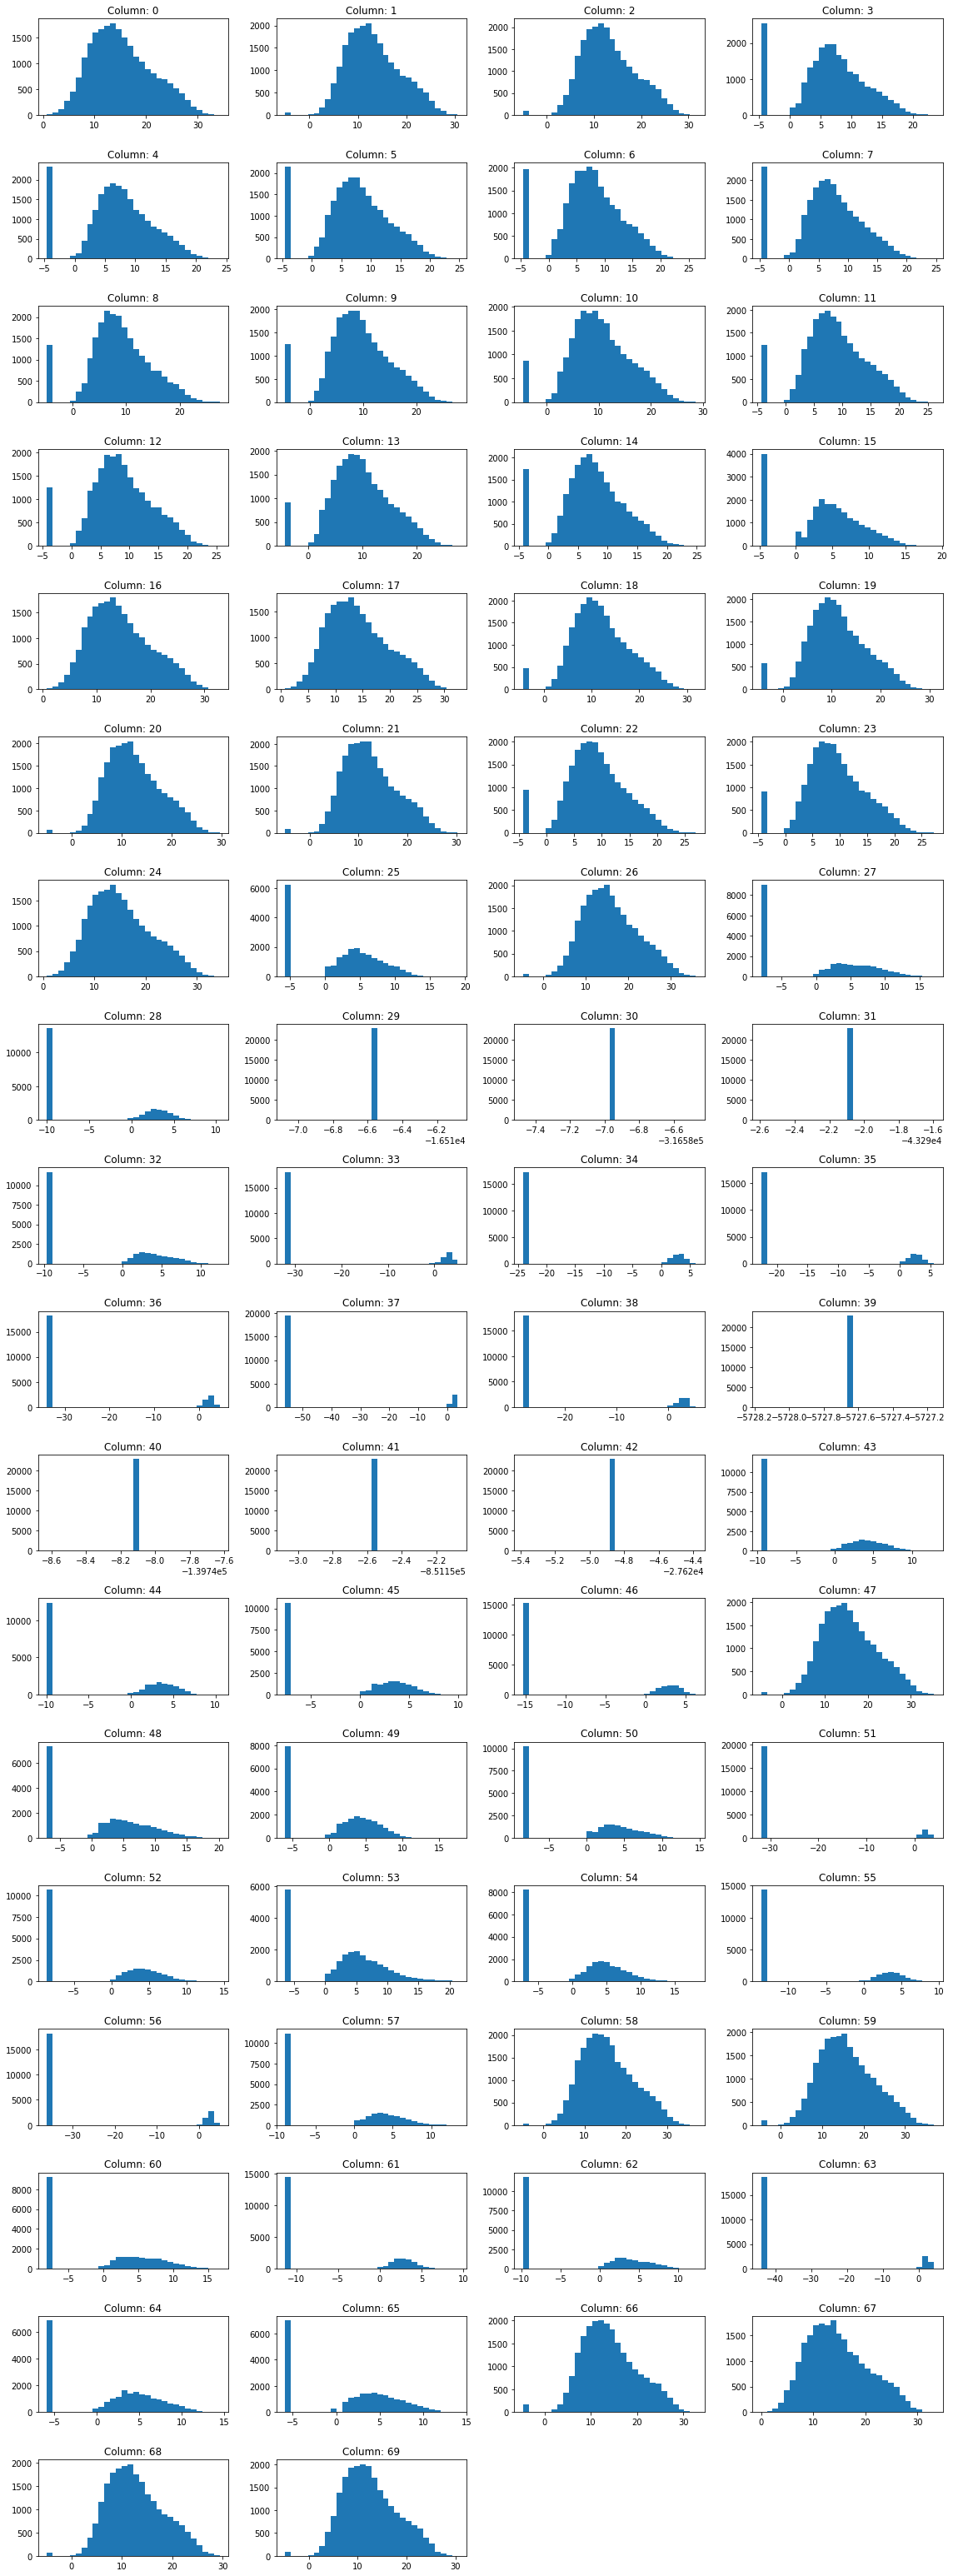

In [42]:
fig = plt.figure(figsize=(16, 50))
for i, c in enumerate(df_X):
    plt.subplot(21, 4, i+1)
    plt.hist(df_X[c].values, bins=30)
    plt.title("Column: {}".format(i))
plt.tight_layout()

In [43]:
# Drop bad/unnecessary columns by hand
drop_columns = df_X.iloc[:, [0, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 51, 56, 63, 67]].columns
drop_columns

Index(['Estimate; SEX AND AGE - Total population',
       'Estimate; RACE - One race - American Indian and Alaska Native - Chippewa tribal grouping',
       'Estimate; RACE - One race - American Indian and Alaska Native - Navajo tribal grouping',
       'Estimate; RACE - One race - American Indian and Alaska Native - Sioux tribal grouping',
       'Estimate; RACE - One race - Asian - Asian Indian',
       'Estimate; RACE - One race - Asian - Chinese',
       'Estimate; RACE - One race - Asian - Filipino',
       'Estimate; RACE - One race - Asian - Korean',
       'Estimate; RACE - One race - Asian - Vietnamese',
       'Estimate; RACE - One race - Asian - Other Asian',
       'Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander - Native Hawaiian',
       'Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander - Guamanian or Chamorro',
       'Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander - Samoan',
       'Estimate; RACE - On

In [44]:
for c in df_X:
    if 'years and over' in c:
        df_X.drop(columns=c, inplace=True)

In [45]:
df_X.drop(columns=drop_columns, inplace=True)

In [46]:
df_X.shape

(22918, 43)

In [47]:
%R require(usdm);

In [48]:
%%R -i df_X -o rdf_vif

rdf_vif = vif(df_X)

In [49]:
rdf_vif.sort_values('VIF')

,Variables,VIF
32,Estimate..HISPANIC.OR.LATINO.AND.RACE...Total....,2.367316
24,Estimate..RACE...Two.or.more.races...White.and...,2.613479
33,Estimate..HISPANIC.OR.LATINO.AND.RACE...Total....,3.164796
22,Estimate..RACE...Two.or.more.races...White.and...,3.210925
23,Estimate..RACE...Two.or.more.races...White.and...,4.119851
31,Estimate..HISPANIC.OR.LATINO.AND.RACE...Total....,4.908663
7,Estimate..SEX.AND.AGE...20.to.24.years,6.998101
37,Estimate..HISPANIC.OR.LATINO.AND.RACE...Total....,7.090598
27,Estimate..RACE...Race.alone.or.in.combination....,7.350811
14,Estimate..SEX.AND.AGE...75.to.84.years,7.777246


In [59]:
# This is subjective -- here we take an extremely soft-handed approach
drop_iloc = np.array(rdf_vif[rdf_vif['VIF'] > 1000]['Variables'].index) - 1
drop_columns = df_X.iloc[:, drop_iloc].columns.tolist()

In [55]:
drop_columns

[]

In [56]:
df_X.drop(columns=drop_columns, inplace=True)

In [57]:
df_X

,Estimate; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Estimate; SEX AND AGE - 5 to 9 years,Estimate; SEX AND AGE - 10 to 14 years,Estimate; SEX AND AGE - 15 to 19 years,Estimate; SEX AND AGE - 20 to 24 years,Estimate; SEX AND AGE - 25 to 34 years,Estimate; SEX AND AGE - 35 to 44 years,Estimate; SEX AND AGE - 45 to 54 years,...,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Black or African American alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - American Indian and Alaska Native alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Asian alone,Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races,"Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races excluding Some other race, and Three or more races",Estimate; HISPANIC OR LATINO AND RACE - Total housing units,"Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
0,21.622557,21.684985,13.958366,14.778029,15.736181,15.687415,14.793490,16.763793,17.218869,18.578019,...,4.996008,4.642573,-8.151872,2.084399,-9.793484,-5.879666,-5.907320,22.874744,21.349686,21.239668
1,17.240780,17.198985,10.510455,10.267039,11.413526,11.881583,11.320211,12.354082,13.519154,14.542468,...,2.984082,3.034131,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,18.191164,16.948260,16.882036
2,18.991879,19.437862,11.743287,11.383778,11.922767,13.187387,11.961652,14.773827,15.643718,16.373940,...,5.509333,5.664579,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,20.531114,19.091116,19.229460
3,23.059908,23.364529,15.413344,15.941369,17.013679,16.819765,15.940651,18.304168,19.559262,19.587181,...,8.157824,7.297565,3.798878,-11.362562,2.482935,3.527288,3.521432,24.535091,22.755645,23.009659
4,17.714097,17.954963,10.228059,11.668325,11.784663,12.379486,10.893783,12.031422,13.628243,14.776180,...,6.166961,6.357243,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,23.802386,17.351968,17.758214
5,25.881035,26.227566,16.968883,18.551166,18.551602,19.235926,17.966857,20.146464,22.270023,22.832502,...,6.001108,6.182281,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,29.038217,25.902601,25.985782
6,23.026709,23.120402,15.802130,16.757905,16.543552,16.744168,16.175783,18.266528,18.605123,19.789484,...,6.553590,6.765801,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,24.293085,22.730048,22.564322
7,24.654272,24.875925,16.142842,17.094684,17.913818,18.406690,17.291332,19.247100,20.705024,21.816672,...,9.264625,9.489068,2.874504,-11.362562,-9.793484,-5.879666,-5.907320,26.560183,24.617411,24.547794
8,12.520045,12.650604,7.134356,7.005012,6.356502,6.687422,7.116882,9.994679,8.576127,9.496738,...,2.683242,2.724215,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,13.236848,12.409766,12.303669
9,22.903649,23.261299,15.148539,15.778578,16.479047,16.881954,15.698201,17.640861,18.901106,19.483454,...,8.396410,8.725738,-8.151872,-11.362562,-9.793484,-5.879666,-5.907320,25.005574,22.702588,22.939090


## ZCTA5 Clustering

In [60]:
df_X.shape

(22918, 43)

In [61]:
df_X_orig = df_X.copy()

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

mms = MinMaxScaler()

df_X = df_X_orig.copy()

df_X.iloc[:, :] = mms.fit_transform(df_X.values)
X = df_X.values

n_components_list = list(range(5, 40, 5))
errors = []
sim_scores = []

In [63]:
for n_components in n_components_list:
    print('Components: ', n_components)
    mf = NMF(n_components=n_components)
    mf.fit(X)
    errors.append(mf.reconstruction_err_)
    
    H = mf.components_
    cos_sim_score = np.triu(cosine_similarity(H), k=1)
    cos_sim_score = cos_sim_score[np.nonzero(cos_sim_score)].min()
    sim_scores.append(cos_sim_score)

Components:  5
Components:  10
Components:  15
Components:  20
Components:  25
Components:  30
Components:  35


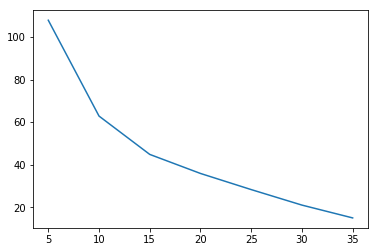

In [64]:
plt.plot(n_components_list, errors)

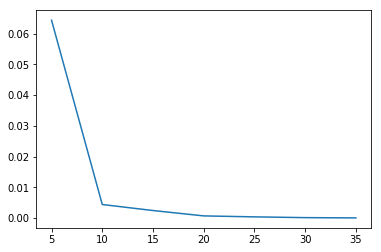

In [65]:
plt.plot(n_components_list, sim_scores)

In [66]:
X = mms.fit_transform(X)
mf = NMF(n_components=10)
mf.fit(X)
H = mf.components_

In [67]:
sort_idx = np.argsort(H, axis=1)
features = np.array(df_X.columns)

In [68]:
top_k_features = 5
for topic in range(H.shape[0]):
    print("=" * 30)
    print("Topic ", topic)
    print("=" * 30)
    for feature_score in list(zip(features[sort_idx[topic][::-1]][:top_k_features], H[topic, sort_idx[topic][::-1]][:top_k_features])):
        print(feature_score)

Topic  0
('Estimate; RACE - Two or more races - White and Asian', 5.5104091735306344)
('Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone', 2.2282166933266407)
('Estimate; RACE - Race alone or in combination with one or more other races - Total population - White', 2.1818195881423623)
('Estimate; RACE - One race - White', 2.1788224220461072)
('Estimate; HISPANIC OR LATINO AND RACE - Total housing units', 2.0848104644083971)
Topic  1
('Estimate; RACE - Race alone or in combination with one or more other races - Total population - White', 1.9680303639637582)
('Estimate; RACE - One race - White', 1.9624968379488867)
('Estimate; HISPANIC OR LATINO AND RACE - Total housing units', 1.9228327887837064)
('Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone', 1.9207631748189082)
('Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male', 1.9119197248682871)
Topic  2
('Estimate; HI

In [69]:
W = mf.transform(X)

In [70]:
clusters = np.argmax(np.abs(W), axis=1)

In [71]:
df_X['clusters'] = clusters

In [72]:
df_X.groupby('clusters').count().iloc[:, 1]

clusters
0     5283
1    17573
2       17
3       18
4        5
5        1
6       17
7        2
9        2
Name: Estimate; SEX AND AGE - Total population - Female, dtype: int64

In [73]:
for c in df_X_orig:
    print(c)

Estimate; SEX AND AGE - Total population - Male
Estimate; SEX AND AGE - Total population - Female
Estimate; SEX AND AGE - Under 5 years
Estimate; SEX AND AGE - 5 to 9 years
Estimate; SEX AND AGE - 10 to 14 years
Estimate; SEX AND AGE - 15 to 19 years
Estimate; SEX AND AGE - 20 to 24 years
Estimate; SEX AND AGE - 25 to 34 years
Estimate; SEX AND AGE - 35 to 44 years
Estimate; SEX AND AGE - 45 to 54 years
Estimate; SEX AND AGE - 55 to 59 years
Estimate; SEX AND AGE - 60 to 64 years
Estimate; SEX AND AGE - 65 to 74 years
Estimate; SEX AND AGE - 75 to 84 years
Estimate; RACE - Total population - One race
Estimate; RACE - Total population - Two or more races
Estimate; RACE - One race - White
Estimate; RACE - One race - Black or African American
Estimate; RACE - One race - American Indian and Alaska Native
Estimate; RACE - One race - Asian
Estimate; RACE - One race - Some other race
Estimate; RACE - Two or more races - White and Black or African American
Estimate; RACE - Two or more races - 

## Archetypes

In [74]:
%R require(archetypes);

In [75]:
df_X.shape

(22918, 44)

In [76]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_X = df_X_orig.copy()

df_X.iloc[:, :] = ss.fit_transform(df_X.values)

In [77]:
%%R -i df_X -o rdf_a

rdf_a = archetypes(df_X, k=10)

In [78]:
print(rdf_a)

Archetypes object

archetypes(data = df_X, k = 10) 

Convergence after 27 iterations
with RSS = 0.005409184.



In [79]:
H = np.array(rdf_a.rx('archetypes')[0])

In [80]:
H.shape

(10, 43)

In [81]:
W = np.array(rdf_a.rx('alphas')[0])

In [82]:
W.shape

(22918, 10)

In [153]:
# from pymf import AA

In [335]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# df_X = df_X_orig.copy()

# df_X.iloc[:, :] = ss.fit_transform(df_X.values)

# aa = AA(df_X.values, num_bases=10)
# aa.factorize()

In [336]:
# W = aa.W
# W.shape

(22097, 10)

In [345]:
# aa.beta.shape

(10, 35)

In [330]:
# H = aa.H
# H.shape

(10, 35)

In [83]:
sort_idx = np.argsort(H, axis=1)
features = np.array(df_X.columns)

In [84]:
top_k_features = 5
for topic in range(H.shape[0]):
    print("=" * 30)
    print("Topic ", topic)
    print("=" * 30)
    for feature_score in list(zip(features[sort_idx[topic][::-1]][:top_k_features], H[topic, sort_idx[topic][::-1]][:top_k_features])):
        print(feature_score)

Topic  0
('Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Black or African American alone', 1.144224312443612)
('Estimate; RACE - One race - Black or African American', 1.1266734064862469)
('Estimate; RACE - Race alone or in combination with one or more other races - Total population - Black or African American', 1.0609722096389991)
('Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - American Indian and Alaska Native alone', 0.94926607367442029)
('Estimate; RACE - One race - American Indian and Alaska Native', 0.81066384987816464)
Topic  1
('Estimate; RACE - Two or more races - White and Black or African American', 1.1680484377782843)
('Estimate; RACE - Two or more races - White and American Indian and Alaska Native', 1.1500941556506845)
('Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races excluding Some other race, and Three or more races', 1.0716280687

In [85]:
W

array([[ 0.11603163,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.12725657],
       [ 0.        ,  0.02030154,  0.08957988, ...,  0.22141781,
         0.        ,  0.        ],
       [ 0.06878226,  0.        ,  0.08093739, ...,  0.        ,
         0.        ,  0.1506847 ],
       ..., 
       [ 0.0071567 ,  0.        ,  0.        , ...,  0.94182756,
         0.        ,  0.        ],
       [ 0.        ,  0.26793168,  0.        , ...,  0.51927732,
         0.        ,  0.2066957 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.81983671,
         0.        ,  0.        ]])

In [86]:
np.all(W >=0)

True

In [87]:
W.sum(axis=1)

array([ 0.99635548,  0.99662199,  0.99587842, ...,  0.99967088,
        0.99808133,  0.99912678])

In [88]:
clusters = np.argmax(np.abs(W), axis=1)

In [89]:
df_X['clusters'] = clusters

In [90]:
df_X.groupby('clusters').count().iloc[:, 1]

clusters
0    1313
1    2197
2     916
3    5631
4    1033
5     521
6    1401
7    6134
8    1711
9    2061
Name: Estimate; SEX AND AGE - Total population - Female, dtype: int64

In [91]:
df_demo.iloc[list(keep_indices), :].reset_index(drop=True).shape

(22918, 79)

In [92]:
df_X.shape

(22918, 44)

In [93]:
df_archetypes = pd.DataFrame(H, columns=df_X.drop(columns='clusters').columns)
df_archetypes.to_csv(os.path.join(os.pardir, 'model', 'archetypes_df.csv'), index=False)

In [94]:
df_data_mixtures = pd.DataFrame(W, columns=['Archetype ' + str(i) for i in range(W.shape[1])])
df_data_mixtures['zip'] = df_demo.iloc[list(keep_indices), :]['zip'].reset_index(drop=True)
df_data_mixtures['cluster'] = clusters
df_data_mixtures.to_csv(os.path.join(os.pardir, 'model', 'data_mixtures_df.csv'), index=False)

In [95]:
df_aa_model_save = df_demo.iloc[list(keep_indices), :].reset_index(drop=True)
df_aa_model_save['cluster'] = clusters
df_aa_model_save = df_zip_geo.merge(df_aa_model_save, on='zip')
df_aa_model_save.to_csv(os.path.join(os.pardir, 'model', 'data_clusters_df.csv'), index=False)

In [96]:
df_data_mixtures

,Archetype 0,Archetype 1,Archetype 2,Archetype 3,Archetype 4,Archetype 5,Archetype 6,Archetype 7,Archetype 8,Archetype 9,zip,cluster
0,0.116032,0.000000,0.000000,0.144584,0.000000,0.608484,0.000000,0.000000,0.000000,0.127257,00601,5
1,0.000000,0.020302,0.089580,0.011707,0.000000,0.653616,0.000000,0.221418,0.000000,0.000000,00606,5
2,0.068782,0.000000,0.080937,0.058354,0.000000,0.637120,0.000000,0.000000,0.000000,0.150685,00616,5
3,0.000000,0.000000,0.093769,0.312165,0.000000,0.474924,0.000000,0.000000,0.116324,0.000000,00617,5
4,0.063200,0.061952,0.000000,0.011927,0.000000,0.649399,0.000000,0.209944,0.000163,0.000000,00622,5
5,0.000000,0.000000,0.000000,0.322343,0.000000,0.674895,0.000000,0.000000,0.000000,0.000000,00623,5
6,0.018609,0.000000,0.053648,0.212639,0.000000,0.637834,0.073952,0.000000,0.000000,0.000000,00624,5
7,0.038336,0.000000,0.000000,0.194110,0.000000,0.764178,0.000000,0.000000,0.000000,0.000000,00627,5
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.509673,0.000000,0.488077,0.000000,0.000000,00631,5
9,0.000000,0.000000,0.000000,0.237603,0.000000,0.633234,0.000000,0.000000,0.000000,0.125946,00637,5
